In [8]:
# Dependencies
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import numpy as np

In [14]:
# Importing data
path = Path('/Users/juliaolson/Data-Analytics-Bootcamp/Projects/Project4/genre_data.csv')
df = pd.read_csv(path)
df.set_index('genre',inplace=True)

df.head(15)

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,,
alt z,(L)only Child,0.645,0.611,8.0,-5.925,0.0,0.1370,0.290000,0.000021,0.2370,0.645,157.475
dance pop,...Baby One More Time,0.759,0.699,0.0,-5.745,0.0,0.0307,0.202000,0.000131,0.4430,0.907,92.960
singer-songwriter pop,12 Hours,0.830,0.414,3.0,-7.387,1.0,0.1480,0.497000,0.000000,0.1870,0.797,87.990
singer-songwriter pop,12:45 - Stripped,0.459,0.214,5.0,-10.660,1.0,0.0403,0.634000,0.000000,0.1250,0.397,163.816
alt z,13 Missed Calls,0.639,0.724,7.0,-6.346,1.0,0.0664,0.452000,0.000000,0.1590,0.522,129.712
alt z,18,0.783,0.599,4.0,-5.688,1.0,0.0441,0.044500,0.000000,0.1080,0.611,113.970
alternative metal,1Stp Klosr (The Humble Brothers Reanimation) [...,0.471,0.927,1.0,-5.760,1.0,0.0495,0.002720,0.537000,0.1150,0.232,96.149
pop,2021,0.849,0.489,0.0,-7.433,1.0,0.0509,0.683000,0.000019,0.1080,0.345,113.977
pop,22,0.642,0.695,7.0,-5.620,1.0,0.0281,0.000443,0.000010,0.0753,0.642,103.984


In [17]:
df.drop(columns='name',inplace=True)

In [50]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,
alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,0.290,0.000021,0.237,0.645,157.475
dance pop,0.759,0.699,0.0,-5.745,0.0,0.0307,0.202,0.000131,0.443,0.907,92.960
singer-songwriter pop,0.830,0.414,3.0,-7.387,1.0,0.1480,0.497,0.000000,0.187,0.797,87.990
singer-songwriter pop,0.459,0.214,5.0,-10.660,1.0,0.0403,0.634,0.000000,0.125,0.397,163.816
alt z,0.639,0.724,7.0,-6.346,1.0,0.0664,0.452,0.000000,0.159,0.522,129.712


FOR SPOTIPY STUFF

In [10]:
export_df = df[['name','energy','acousticness','loudness','instrumentalness']]
export_df

,name,energy,acousticness,loudness,instrumentalness
genre,,,,,
alt z,(L)only Child,0.611,0.290,-5.925,0.000021
dance pop,...Baby One More Time,0.699,0.202,-5.745,0.000131
singer-songwriter pop,12 Hours,0.414,0.497,-7.387,0.000000
singer-songwriter pop,12:45 - Stripped,0.214,0.634,-10.660,0.000000
alt z,13 Missed Calls,0.724,0.452,-6.346,0.000000
...,...,...,...,...,...
art pop,Young And Beautiful,0.416,0.262,-8.920,0.000037
pop,Young Dumb & Broke,0.539,0.199,-6.351,0.000017
pop,Younger,0.845,0.286,-2.793,0.000016


In [11]:
export_df.to_csv('../spotipy_data.csv',index=True,header=True)

END

In [12]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000
mean,0.623414,0.582162,5.242749,-8.017267,0.602774,0.078939,0.343585,0.122598,0.172914,0.448491,118.445532
std,0.139845,0.242531,3.545047,4.979777,0.489401,0.076188,0.322200,0.292314,0.126260,0.229787,28.350924
min,0.000000,0.002810,0.000000,-33.153000,0.000000,0.000000,0.000010,0.000000,0.027200,0.000000,0.000000
25%,0.543000,0.426000,2.000000,-9.100000,0.000000,0.036700,0.047900,0.000000,0.096700,0.265000,98.004000
50%,0.636000,0.597500,5.000000,-6.842500,1.000000,0.050500,0.232000,0.000005,0.121000,0.424000,117.945000
75%,0.720000,0.773000,8.000000,-5.044000,1.000000,0.082000,0.615000,0.001610,0.205000,0.618000,136.112000
max,0.965000,0.997000,11.000000,1.106000,1.000000,0.621000,0.996000,0.986000,0.964000,0.972000,208.110000


In [19]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
data_scaled = StandardScaler().fit_transform(df)

In [20]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# Display sample data
df_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.154379,0.118922,0.777898,0.420219,-1.231852,0.762203,-0.166336,-0.419401,0.507650,0.855312,1.376873
1,0.969697,0.481820,-1.479127,0.456371,-1.231852,-0.633258,-0.439502,-0.419023,2.139459,1.995676,-0.899073
2,1.477483,-0.693475,-0.632743,0.126585,0.811786,0.906607,0.476224,-0.419471,0.111579,1.516897,-1.074404
3,-1.175877,-1.518243,-0.068486,-0.530777,0.811786,-0.507234,0.901494,-0.419471,-0.379548,-0.224116,1.600569
4,0.111467,0.584916,0.495770,0.335664,0.811786,-0.164604,0.336537,-0.419471,-0.110220,0.319951,0.397456


In [82]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

IGNORE

In [83]:
key_features_kmeans4 = df_scaled[['energy','loudness','acousticness','instrumentalness']]

In [84]:
key_features_kmeans4

,energy,loudness,acousticness,instrumentalness
0,0.118922,0.420219,-0.166336,-0.419401
1,0.481820,0.456371,-0.439502,-0.419023
2,-0.693475,0.126585,0.476224,-0.419471
3,-1.518243,-0.530777,0.901494,-0.419471
4,0.584916,0.335664,0.336537,-0.419471
...,...,...,...,...
3167,-0.685227,-0.181308,-0.253252,-0.419345
3168,-0.177994,0.334659,-0.448814,-0.419414
3169,1.083901,1.049262,-0.178753,-0.419417
3170,-0.433673,0.062516,-0.439502,-0.419471


In [85]:
# Create a list with the number of k-values from 1 to 11
scaled_k = list(range(1,11))

In [86]:
# Create an empty list to store the inertia values
scaled_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in scaled_k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(key_features_kmeans4)
    scaled_inertia.append(k_model.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [87]:
# Create a dictionary with the data to plot the Elbow curve
scaled_elbow_data = {'k':scaled_k,'inertia':scaled_inertia}

# Create a DataFrame with the data to plot the Elbow curve
scaled_elbow_df = pd.DataFrame(scaled_elbow_data)

In [88]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
scaled_elbow_plot = scaled_elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Scaled Elbow Curve", 
    xticks=scaled_k)
scaled_elbow_plot

:Curve   [k]   (inertia)

In [89]:
# Initialize the K-Means model using the best value for k
scaled_model = KMeans(n_clusters=3, random_state=42)

In [90]:
# Fit the K-Means model using the scaled data
scaled_model.fit(key_features_kmeans4)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [91]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_k_4 = scaled_model.predict(key_features_kmeans4)

# Print the resulting array of cluster values.
scaled_k_4

array([0, 0, 2, ..., 0, 0, 2], dtype=int32)

In [92]:
# Create a copy of the DataFrame
scaled_predictions = key_features_kmeans4.copy()

In [123]:
# Add a new column to the DataFrame with the predicted clusters
scaled_predictions['clusters'] = pd.Categorical(scaled_k_4)

# Display sample data
scaled_predictions.head()

,energy,loudness,acousticness,instrumentalness,clusters
0,0.118922,0.420219,-0.166336,-0.419401,0
1,0.481820,0.456371,-0.439502,-0.419023,0
2,-0.693475,0.126585,0.476224,-0.419471,2
3,-1.518243,-0.530777,0.901494,-0.419471,2
4,0.584916,0.335664,0.336537,-0.419471,0


In [135]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [144]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    pd.plotting.parallel_coordinates(df, 'clusters')

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

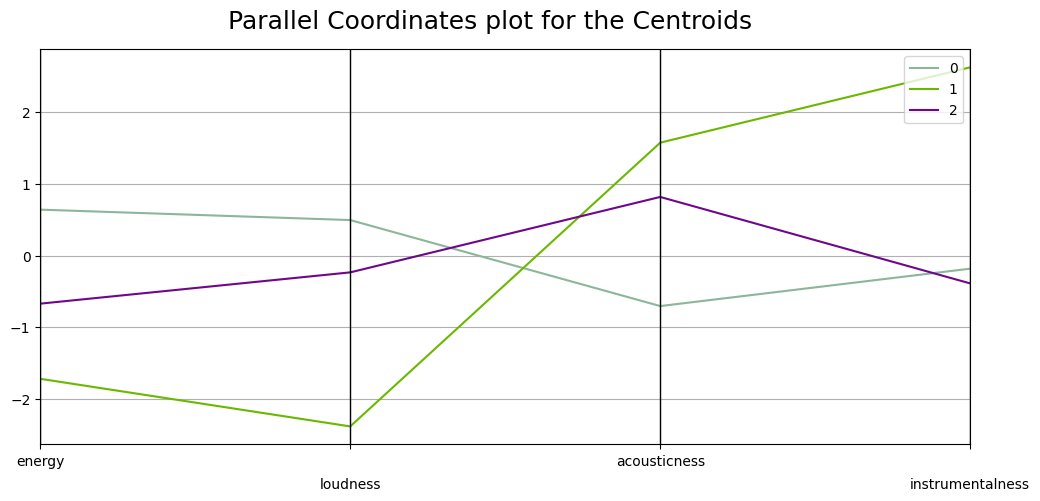

In [145]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(scaled_model.cluster_centers_, columns=key_features_kmeans4.columns)
centroids['clusters'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

In [143]:
scaled_model

KMeans(n_clusters=3, random_state=42)

In [108]:
scaled_predictions2 = scaled_predictions.drop(columns=['clusters'])

In [109]:
scaled_predictions2

,energy,loudness,acousticness,instrumentalness
0,0.118922,0.420219,-0.166336,-0.419401
1,0.481820,0.456371,-0.439502,-0.419023
2,-0.693475,0.126585,0.476224,-0.419471
3,-1.518243,-0.530777,0.901494,-0.419471
4,0.584916,0.335664,0.336537,-0.419471
...,...,...,...,...
3167,-0.685227,-0.181308,-0.253252,-0.419345
3168,-0.177994,0.334659,-0.448814,-0.419414
3169,1.083901,1.049262,-0.178753,-0.419417
3170,-0.433673,0.062516,-0.439502,-0.419471


In [110]:
# Create a PCA model instance
pca4 = PCA(n_components=2)

compents_df4 = pca4.fit(scaled_predictions)
print(compents_df4.components_)

# Use the PCA model with `fit_transform`
spotify_pca4 = pca4.fit_transform(scaled_predictions)

# View the first five rows of the DataFrame. 
#print(spotify_pca4)

# Create the PCA DataFrame
pca_df4 = pd.DataFrame(
    spotify_pca4,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df4.head()

[[-0.5202916  -0.50143524  0.50498313  0.30339235  0.36166901]
 [ 0.10394866 -0.27562201 -0.22952121  0.75210104 -0.54303888]]


,PCA1,PCA2
0,-0.754052,0.025024
1,-1.098822,0.115764
2,0.863668,-1.212103
3,1.837166,-1.214262
4,-0.700185,-0.018704


In [ ]:
pca_df = pd.concat([df.reset_index(),pca_df],axis='columns')[['genre','PCA1','PCA2']].set_index('genre')

In [115]:
correct_df = pd.concat([pca_df4,scaled_predictions['clusters']],axis='columns')

In [125]:
correct_df.head()

,PCA1,PCA2,clusters
0,-0.754052,0.025024,0
1,-1.098822,0.115764,0
2,0.863668,-1.212103,2
3,1.837166,-1.214262,2
4,-0.700185,-0.018704,0


In [111]:
import seaborn as sns

<Axes: xlabel='PCA1', ylabel='PCA2'>

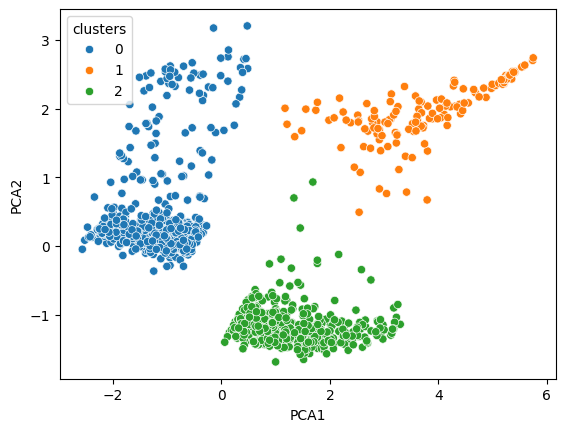

In [116]:
sns.scatterplot(x="PCA1",y="PCA2",hue="clusters",data=correct_df)

In [ ]:
# Define the model with 3 clusters
model4 = KMeans(n_clusters=3, random_state=42)

# Fit the model
model4.fit(scaled_predictions)

# Make predictions
k_34 = model4.predict(scaled_predictions)

# Create a copy of the PCA DataFrame
song_pca_predictions_df4 = scaled_predictions.copy()

# Add a class column with the labels
song_pca_predictions_df4["predictions"] = k_34

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, scaled_predictions['clusters'])
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.14670449643988273


IGNORE END

CORRELATION MATRIX to reduce dimensionality

In [55]:
correlation_matrix = df_scaled.corr()

In [56]:
correlation_matrix[correlation_matrix>0.5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,1.000000,NaN,0.798557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,0.798557,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [57]:
correlation_matrix[correlation_matrix<-0.5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,NaN,NaN,NaN,NaN,-0.768919,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,NaN,NaN,NaN,NaN,-0.669824,-0.612391,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,-0.768919,NaN,-0.669824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,-0.612391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


energy_acousticness = -0.761481
loudness_acousticness = -0.640883
loudness_instrumentalness = -0.574328
energy_loudness = 0.798557

energy, acousticness, loudness, instrumentalness

In [58]:
key_features = df_scaled[['energy','acousticness','loudness','instrumentalness']]

In [59]:
key_features.head()

,energy,acousticness,loudness,instrumentalness
0,0.118922,-0.166336,0.420219,-0.419401
1,0.481820,-0.439502,0.456371,-0.419023
2,-0.693475,0.476224,0.126585,-0.419471
3,-1.518243,0.901494,-0.530777,-0.419471
4,0.584916,0.336537,0.335664,-0.419471


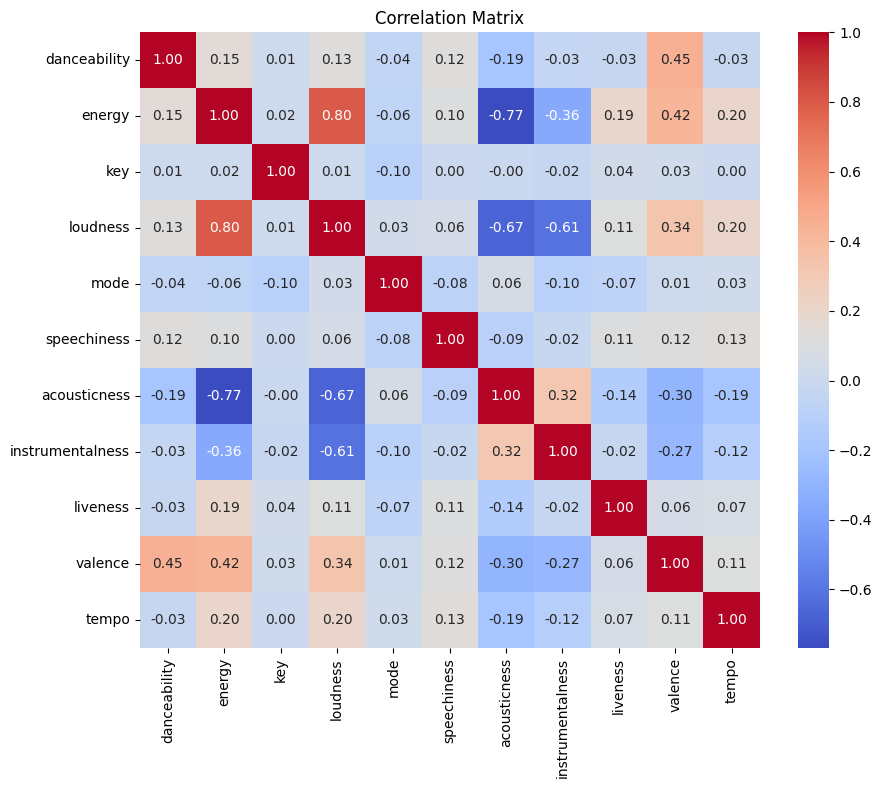

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
key_features.hvplot.scatter(
    x="energy",
    y="loudness",
    by="clusters",

)

:NdOverlay   [clusters]
   :Scatter   [energy]   (loudness)

END CORRELATION

THOMAS SUGGESTION START

THOMAS SUGGESTION END

In [ ]:
# Create a PCA model instance
pca = PCA(n_components=2)

compents_df = pca.fit(key_features)
compents_df.components_

# Use the PCA model with `fit_transform`
spotify_pca = pca.fit_transform(key_features)

# View the first five rows of the DataFrame. 
spotify_pca

# Create the PCA DataFrame
pca_df = pd.DataFrame(
    spotify_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

pca_df = pd.concat([df.reset_index(),pca_df],axis='columns')[['genre','PCA1','PCA2']].set_index('genre')

In [23]:
# Create a PCA model instance
pca = PCA(n_components=2)

In [40]:
compents_df = pca.fit(key_features)
compents_df.components_

array([[-0.53720498,  0.50413394, -0.55568573,  0.38532213],
       [ 0.33134005, -0.41074228, -0.10881179,  0.8424159 ]])

In [76]:
# Use the PCA model with `fit_transform`
spotify_pca = pca.fit_transform(key_features)

# View the first five rows of the DataFrame. 
spotify_pca

array([[-0.54285532, -0.29131   ],
       [-0.89546143, -0.06248191],
       [ 0.38064565, -0.79252448],
       ...,
       [-1.41706255, -0.03493444],
       [-0.18496748, -0.32334281],
       [ 2.09084543, -1.37834412]])

In [77]:
spotify_pca_array = spotify_pca.copy()

In [78]:
spotify_pca_array

array([[-0.54285532, -0.29131   ],
       [-0.89546143, -0.06248191],
       [ 0.38064565, -0.79252448],
       ...,
       [-1.41706255, -0.03493444],
       [-0.18496748, -0.32334281],
       [ 2.09084543, -1.37834412]])

In [33]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.70108131, 0.19524756])

In [34]:
# Create the PCA DataFrame
pca_df = pd.DataFrame(
    spotify_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
pca_df.head()

,PCA1,PCA2
0,-0.542855,-0.291310
1,-0.895461,-0.062482
2,0.380646,-0.792524
3,1.403395,-1.168951
4,-0.492715,-0.334317


In [42]:
pca_df = pd.concat([df.reset_index(),pca_df],axis='columns')[['genre','PCA1','PCA2']].set_index('genre')

In [43]:
pca_df

,PCA1,PCA2
genre,,
alt z,-0.542855,-0.291310
dance pop,-0.895461,-0.062482
singer-songwriter pop,0.380646,-0.792524
singer-songwriter pop,1.403395,-1.168951
alt z,-0.492715,-0.334317
...,...,...
art pop,0.179602,-0.456556
pop,-0.478218,-0.264366
pop,-1.417063,-0.034934


In [44]:
# elbow method with pca

# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=42)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

,k,inertia
0,1,11372.620695
1,2,5531.864309
2,3,2757.351239
3,4,1921.642611
4,5,1263.702177


In [45]:
 # Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [46]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(pca_df)

# Make predictions
k_3 = model.predict(pca_df)

# Create a copy of the PCA DataFrame
song_pca_predictions_df = pca_df.copy()

# Add a class column with the labels
song_pca_predictions_df["predictions"] = k_3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
song_pca_predictions_df

,PCA1,PCA2,predictions
genre,,,
alt z,-0.542855,-0.291310,0
dance pop,-0.895461,-0.062482,0
singer-songwriter pop,0.380646,-0.792524,2
singer-songwriter pop,1.403395,-1.168951,2
alt z,-0.492715,-0.334317,0
...,...,...,...
art pop,0.179602,-0.456556,2
pop,-0.478218,-0.264366,0
pop,-1.417063,-0.034934,0


In [146]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(song_pca_predictions_df[['PCA1','PCA2']], song_pca_predictions_df['predictions'])
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.5340820660856578


In [119]:
# Plot the clusters
song_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predictions",
    hover_cols=['genre']
)

:NdOverlay   [predictions]
   :Scatter   [PCA1]   (PCA2,genre)

In [120]:
# Plot the clusters
correct_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="clusters"
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/holoviews/core/data/pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2)

In [121]:
print(compents_df4.components_)

[[-0.5202916  -0.50143524  0.50498313  0.30339235  0.36166901]
 [ 0.10394866 -0.27562201 -0.22952121  0.75210104 -0.54303888]]


<Axes: xlabel='PCA1', ylabel='PCA2'>

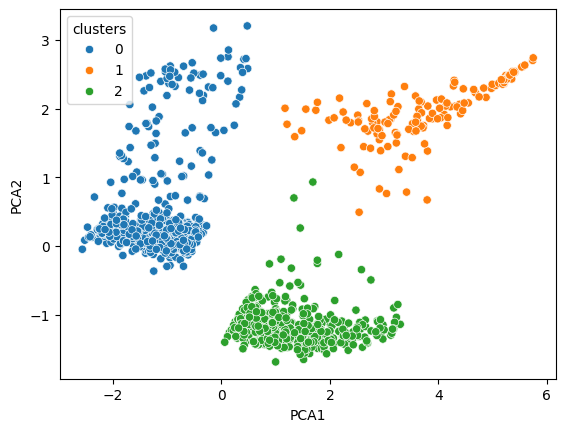

In [117]:
sns.scatterplot(x="PCA1",y="PCA2",hue="clusters",data=correct_df)

energy_acousticness = -0.761481
loudness_acousticness = -0.640883
loudness_instrumentalness = -0.574328
energy_loudness = 0.798557

energy, acousticness, loudness, instrumentalness

PCA1: energy, acousticness, loudness
PCA2: instrumentalness

In [87]:
genreXpred = song_pca_predictions_df.reset_index()[['genre','predictions']]

In [92]:
cluster0 = genreXpred[genreXpred['predictions']==0]['genre'].unique()
cluster0

array(['lo-fi study', 'anime lo-fi', 'anime', 'drift phonk',
       'modern alternative rock', 'alternative metal',
       'singer-songwriter pop', 'alt z'], dtype=object)

In [97]:
genreXpred[genreXpred['predictions']==0]['genre'].value_counts()

genre
anime lo-fi                134
lo-fi study                110
anime                       26
alternative metal            6
drift phonk                  4
modern alternative rock      4
singer-songwriter pop        2
alt z                        2
Name: count, dtype: int64

In [93]:
cluster1 = genreXpred[genreXpred['predictions']==1]['genre'].unique()
cluster1

array(['alt z', 'dance pop', 'alternative metal', 'pop',
       'singer-songwriter pop', 'modern alternative rock', 'filmi',
       'art pop', 'edm', 'brostep', 'anime', 'anime lo-fi', 'drift phonk',
       'chill pop'], dtype=object)

In [98]:
genreXpred[genreXpred['predictions']==1]['genre'].value_counts()

genre
pop                        418
filmi                      246
alt z                      244
dance pop                  166
alternative metal          132
drift phonk                120
brostep                    116
modern alternative rock     94
edm                         88
singer-songwriter pop       82
art pop                     72
anime                       62
chill pop                   38
anime lo-fi                  2
Name: count, dtype: int64

In [95]:
cluster2 = genreXpred[genreXpred['predictions']==2]['genre'].unique()
cluster2

array(['singer-songwriter pop', 'pop', 'alt z', 'art pop', 'filmi',
       'chill pop', 'anime', 'modern alternative rock',
       'alternative metal', 'edm', 'dance pop'], dtype=object)

In [99]:
genreXpred[genreXpred['predictions']==2]['genre'].value_counts()

genre
alt z                      410
pop                        184
filmi                      166
singer-songwriter pop       80
chill pop                   56
art pop                     54
modern alternative rock     14
alternative metal           12
edm                         12
anime                       10
dance pop                    6
Name: count, dtype: int64

In [61]:
pca_df

,PCA1,PCA2
genre,,
alt z,-0.542855,-0.291310
dance pop,-0.895461,-0.062482
singer-songwriter pop,0.380646,-0.792524
singer-songwriter pop,1.403395,-1.168951
alt z,-0.492715,-0.334317
...,...,...
art pop,0.179602,-0.456556
pop,-0.478218,-0.264366
pop,-1.417063,-0.034934


In [62]:
song_pca_predictions_df

,PCA1,PCA2,predictions
genre,,,
alt z,-0.542855,-0.291310,0
dance pop,-0.895461,-0.062482,0
singer-songwriter pop,0.380646,-0.792524,2
singer-songwriter pop,1.403395,-1.168951,2
alt z,-0.492715,-0.334317,0
...,...,...,...
art pop,0.179602,-0.456556,2
pop,-0.478218,-0.264366,0
pop,-1.417063,-0.034934,0


In [ ]:
scaled_predictions[['energy', 'acousticness', 'loudness', 'instrumentalness']]

In [75]:
spotify_pca

PCA(n_components=2)

In [81]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(k_3)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x400 with 0 Axes>

In [80]:
k_3

array([0, 0, 2, ..., 0, 0, 2], dtype=int32)